In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [3]:
forest_model = RandomForestRegressor(max_depth=2)

When the
relationships in data are linear (or close to it), linear models will tend to produce more
accurate predictions, with the bonus of being easy to interpret. When relationships
are more complex, tree-based methods may perform better. For example, the profit
made by a firm and the profit made by each advertisement run by them is a linear
relationship. If the profit made by each ad doubles, the overall profit of the firm will
also double. However, the number of ads doesn't necessarily have to follow a linear
relationship with the profit, as you can have 100 ads performing poorly, versus only
one ad performing really well. This is a complex, or non-linear, relationship. Testing
each and choosing the best model for the job requires evaluating the models based
on their predictive accuracy with a metric such as the RMSE. The choice is ultimately
dependent on the data you are working on. 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter06/Exercise6.03/age_spend.csv')

In [6]:
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [7]:
X = df[['age']]
y = df[['spend']]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [20]:
from sklearn.tree import DecisionTreeClassifier

max2_model = DecisionTreeClassifier(max_depth=2)
max5_model = DecisionTreeClassifier(max_depth=5)

linear_model.fit(X_train, y_train)

max2_model.fit(X_train, y_train)
max5_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
from sklearn.metrics import mean_squared_error

linear_predictions = linear_model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
max2_tree_predictions = max2_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
max5_tree_predictions = max5_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 134.16310968369808
tree with max depth of 5 RMSE: 152.06457838694718


Import matplotlib. Create a variable called ages to store a DataFrame with
a single column containing ages from 18 to 70, so that we can have our models
give us their predictions for all these ages:

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
ages = pd.DataFrame({'age':range(18,70)})

Create a scatter plot with the test data and, on top of it, plot the predictions from
the linear regression model for the range of ages. Plot with color='k' and
linewidth=5 to make it easier to see:


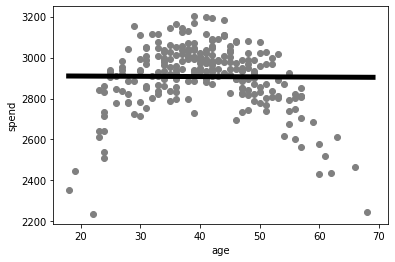

In [38]:

plt.scatter(X_test['age'].to_numpy(), y_test.to_numpy(), color='gray')
plt.plot(ages.to_numpy(),linear_model.predict(ages), color='k', linewidth=5, \
label="Linear Regression")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

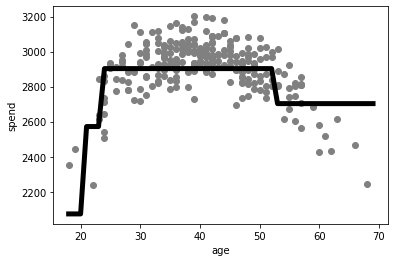

In [40]:
plt.scatter(X_test.age.to_numpy(), y_test.to_numpy(), color='gray')
plt.plot(ages.to_numpy(),max2_model.predict(ages), \
         color='k',linewidth=5,label="Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

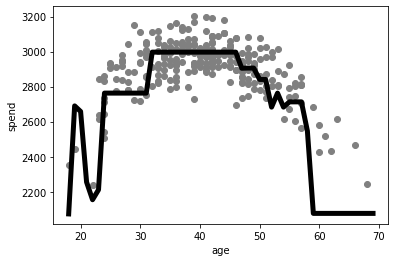

In [41]:
plt.scatter(X_test.age.to_numpy(), y_test.to_numpy(), color='gray')
plt.plot(ages.to_numpy(),max5_model.predict(ages), \
         color='k',linewidth=5,label="Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

In this exercise, you saw that the tree-based models outperformed the linear
regression model since the data was non-linear. Among the tree-based models, the
random forest model had the lowest RMSE value. You also saw that by increasing
the maximum depth from 2 to 5, the curve started fitting the training dataset more
tightly. You will explore this part in detail in later chapters. You also saw that for
people aged between 20 and 40, the total expenditure increased with age; however,
for people aged over 50, the trend was completely the opposite